In [1]:
import math
import numpy as np
from pop import LiDAR
import time
import matplotlib.pyplot as plt

lidar = LiDAR.Rplidar()
lidar.connect()
lidar.startMotor()

def create_point(distance, step, angle, max_x):
    point = []
    for i in range( 0, distance, step):
        rad = math.radians(angle)
        point.append([int(max_x/2 + i*math.sin(rad)), int(i*math.cos(rad))])
    return point

x_axis = 3000 #1500
y_axis = 1500 #1500
ObstacleDistance = 350 #700

padding = 30
step = 30

center = create_point(ObstacleDistance,step,0,x_axis)
print(center)
right = create_point(ObstacleDistance,step,30,x_axis)
print(right)
left = create_point(ObstacleDistance,step,-30,x_axis)
print(left)

WARNNIG: Jetson.GPIO library has not been verified with this carrier board,


[[1500, 0], [1500, 30], [1500, 60], [1500, 90], [1500, 120], [1500, 150], [1500, 180], [1500, 210], [1500, 240], [1500, 270], [1500, 300], [1500, 330]]
[[1500, 0], [1514, 25], [1529, 51], [1544, 77], [1559, 103], [1574, 129], [1589, 155], [1604, 181], [1619, 207], [1634, 233], [1649, 259], [1664, 285]]
[[1500, 0], [1486, 25], [1471, 51], [1456, 77], [1441, 103], [1426, 129], [1411, 155], [1396, 181], [1381, 207], [1366, 233], [1351, 259], [1336, 285]]


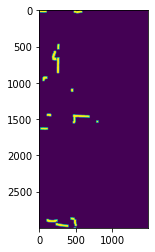

co vat can ben trai cach:182.43354954612926
k vat can o giua
k vat can ben phai


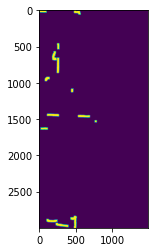

co vat can ben trai cach:182.43354954612926
k vat can o giua
k vat can ben phai


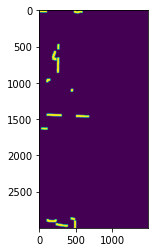

co vat can ben trai cach:145.66399692442877
k vat can o giua
k vat can ben phai


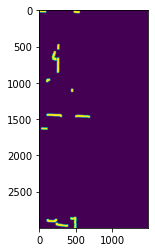

co vat can ben trai cach:145.66399692442877
k vat can o giua
k vat can ben phai


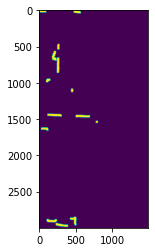

co vat can ben trai cach:182.43354954612926
k vat can o giua
k vat can ben phai


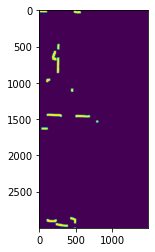

co vat can ben trai cach:182.43354954612926
k vat can o giua
k vat can ben phai


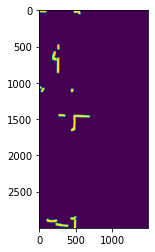

k vat can o giua
k vat can ben phai
k vat can ben trai


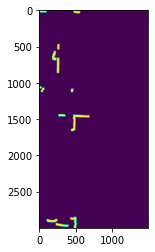

k vat can o giua
k vat can ben phai
k vat can ben trai


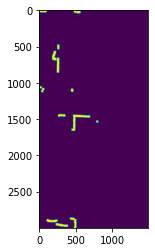

k vat can o giua
k vat can ben phai
k vat can ben trai


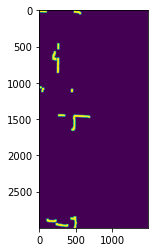

k vat can o giua
k vat can ben phai
k vat can ben trai


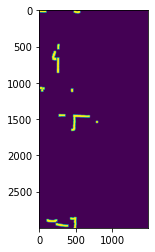

k vat can o giua
k vat can ben phai
k vat can ben trai


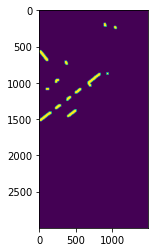

co vat can o giua cach: 30.0
co vat can ben phai cach:35.35533905932737
co vat can ben trai cach:35.35533905932737


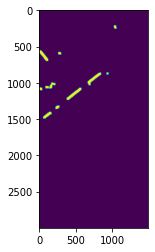

co vat can ben trai cach:108.89444430272832
k vat can o giua
k vat can ben phai


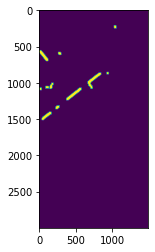

co vat can o giua cach: 60.0
co vat can ben trai cach:72.12489168102785
k vat can ben phai


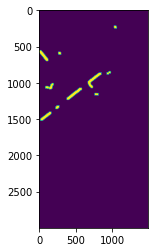

co vat can o giua cach: 30.0
co vat can ben phai cach:35.35533905932737
co vat can ben trai cach:72.12489168102785


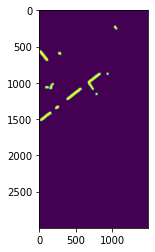

co vat can o giua cach: 30.0
co vat can ben phai cach:35.35533905932737
co vat can ben trai cach:72.12489168102785


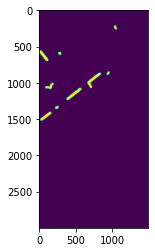

co vat can o giua cach: 30.0
co vat can ben phai cach:35.35533905932737
co vat can ben trai cach:72.12489168102785


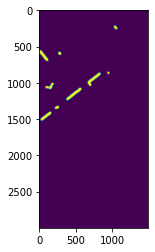

co vat can o giua cach: 30.0
co vat can ben phai cach:35.35533905932737
co vat can ben trai cach:72.12489168102785


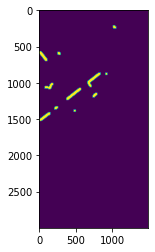

co vat can o giua cach: 30.0
co vat can ben phai cach:35.35533905932737
co vat can ben trai cach:35.35533905932737


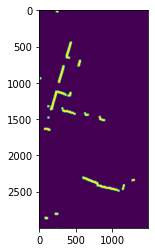

k vat can o giua
k vat can ben phai
k vat can ben trai


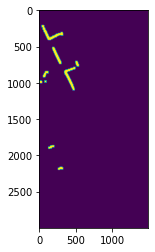

k vat can o giua
k vat can ben phai
k vat can ben trai


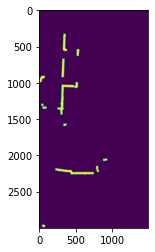

co vat can ben trai cach:366.2813126546316
k vat can o giua
k vat can ben phai


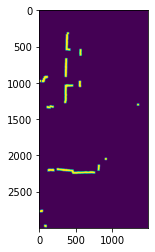

k vat can o giua
k vat can ben phai
k vat can ben trai


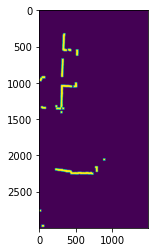

co vat can ben trai cach:366.2813126546316
k vat can o giua
k vat can ben phai


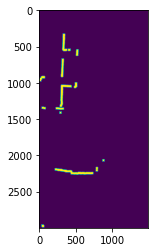

co vat can ben trai cach:329.51176003293114
k vat can o giua
k vat can ben phai


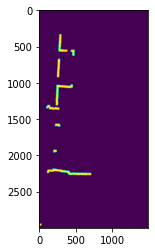

co vat can ben trai cach:329.51176003293114
k vat can o giua
k vat can ben phai


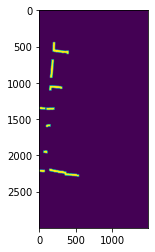

co vat can ben phai cach:182.43354954612926
k vat can o giua
k vat can ben trai


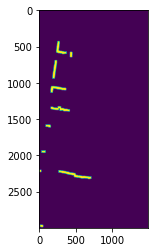

co vat can ben phai cach:219.2031021678297
co vat can ben trai cach:329.51176003293114
k vat can o giua


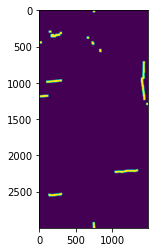

k vat can o giua
k vat can ben phai
k vat can ben trai


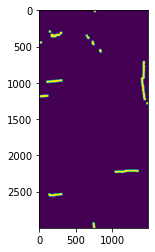

k vat can o giua
k vat can ben phai
k vat can ben trai


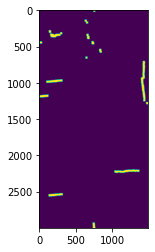

k vat can o giua
k vat can ben phai
k vat can ben trai


KeyboardInterrupt: 

In [3]:
x_axis = 3000 #1500
y_axis = 1500 #1500
ObstacleDistance = 350 #700

padding = 50
step = 10

center = create_point(ObstacleDistance,step,0,x_axis)
print(center)
right = create_point(ObstacleDistance,step,30,x_axis)
print(right)
left = create_point(ObstacleDistance,step,-30,x_axis)
print(left)

while True:

    costmap = np.zeros((x_axis, y_axis))
    vectors = lidar.getVectors()
    for v in vectors:
        if(v[0] >= 0 and v[0] <= 90):
            rad = math.radians(v[0])
            x = v[1]*math.sin(rad)/2 + x_axis/2
            y = (v[1]*math.cos(rad))/2
            
            for m in range(padding):
                if x + m < x_axis:
                    for n in range(padding):
                        if y + n < y_axis:
                            costmap[int(x) + m,int(y) + n] = 1

        if(v[0] >= 270 and v[0] <= 360):
            rad = math.radians(v[0]- 270)
            x = -v[1]*math.cos(rad)/2 + x_axis/2
            y = (v[1]*math.sin(rad))/2
            for m in range(padding):
                if x + m < x_axis:
                    for n in range(padding):
                        if y + n < y_axis:
                            costmap[int(x) + m,int(y) + n] = 1
                            
    plt.imshow(costmap)
    plt.show()
    center_object = 0
    right_object = 0
    left_object = 0
                            
    for i in range(len(center)):
        if costmap[center[i][0],center[i][1]] == 1:
            print("co vat can o giua cach: " + str(center[i][1]/math.cos(math.radians(0))))
            center_object = 1
            break
    
    for i in range(len(right)):
        if costmap[right[i][0],right[i][1]] == 1:
            print("co vat can ben phai cach:" + str(right[i][1]/math.cos(math.radians(45))))
            right_object = 1
            break
   
    for i in range(len(left)):
        if costmap[left[i][0],left[i][1]] == 1:
            print("co vat can ben trai cach:" + str(left[i][1]/math.cos(math.radians(45))))
            left_object = 1
            break
        
    if center_object == 0:
        print("k vat can o giua")
    if right_object == 0:
        print("k vat can ben phai")
    if left_object == 0:
        print("k vat can ben trai")    
    time.sleep(5)